# Business Problem

Survey repondents given various driving scenarios were asked whether they would accept a coupon given the context of their driving scenario. Based on the survey responses what are factors that might contribute to whether someone would accept or not accept coupons?

# Data Exploration

In [275]:
# import libraries

import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [277]:
# read in the dataset

df = pd.read_csv('data/in-vehicle-coupon-recommendation.csv')

In [279]:
# preview first 10 rows of data

df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [281]:
# summarize columns and data types

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

# Data Cleaning
* Check for duplicates
* Check for missing values
* Add new column for legibility on coupon accepted or not accepted

In [283]:
# check size of df before removing duplicates

print("Before removing duplicates:", df.shape)

Before removing duplicates: (12684, 26)


In [285]:
# remove duplicates and check df size again

df = df.drop_duplicates()
print("After removing duplicates:", df.shape)

After removing duplicates: (12610, 26)


In [287]:
# check for missing values

missing_counts = df.isnull().sum().sort_values()
print(missing_counts)


destination                 0
direction_same              0
toCoupon_GEQ25min           0
toCoupon_GEQ15min           0
toCoupon_GEQ5min            0
income                      0
direction_opp               0
education                   0
has_children                0
occupation                  0
age                         0
gender                      0
expiration                  0
coupon                      0
time                        0
temperature                 0
weather                     0
passanger                   0
maritalStatus               0
Y                           0
Bar                       107
RestaurantLessThan20      129
CarryAway                 150
Restaurant20To50          189
CoffeeHouse               217
car                     12502
dtype: int64


In [289]:
# create new column "coupon_used" based on column Y for whether a coupon was accepted or not accepted

df['coupon_used'] = df['Y'].apply(lambda x: 'accepted' if x == 1 else 'not accepted')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null  obj

In [293]:
# check first 10 rows again

df.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,coupon_used
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,1,accepted
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,0,not accepted
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,accepted
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,not accepted
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,not accepted
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,accepted
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,accepted
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,accepted
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,accepted
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,not accepted


# Data Analysis

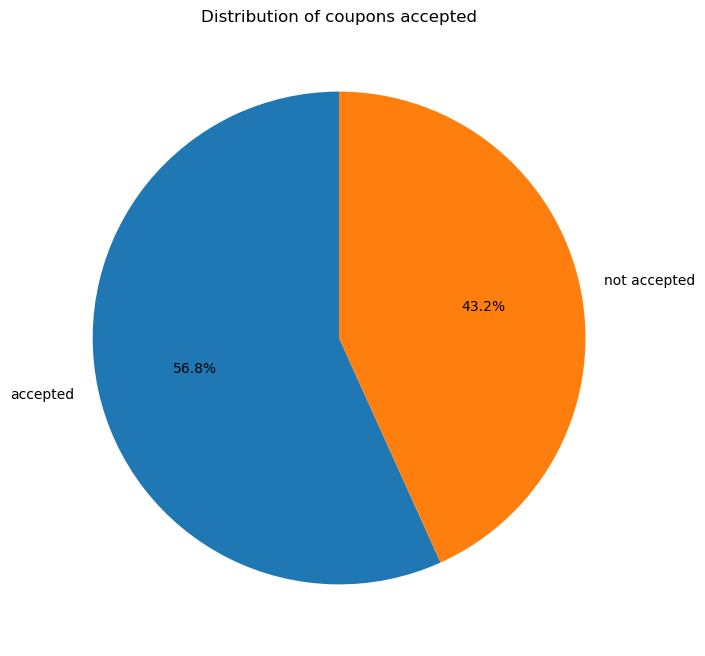

In [297]:
# look at the overall % occurrences of coupons accepted or not accepted in coupon_used
coupon_counts = df['coupon_used'].value_counts()

# plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(
    coupon_counts,
    labels=coupon_counts.index,
    autopct='%1.1f%%',  # Display percentages
    startangle=90,  # Rotate to start from the top
)
plt.title("Distribution of coupons accepted")
plt.show()

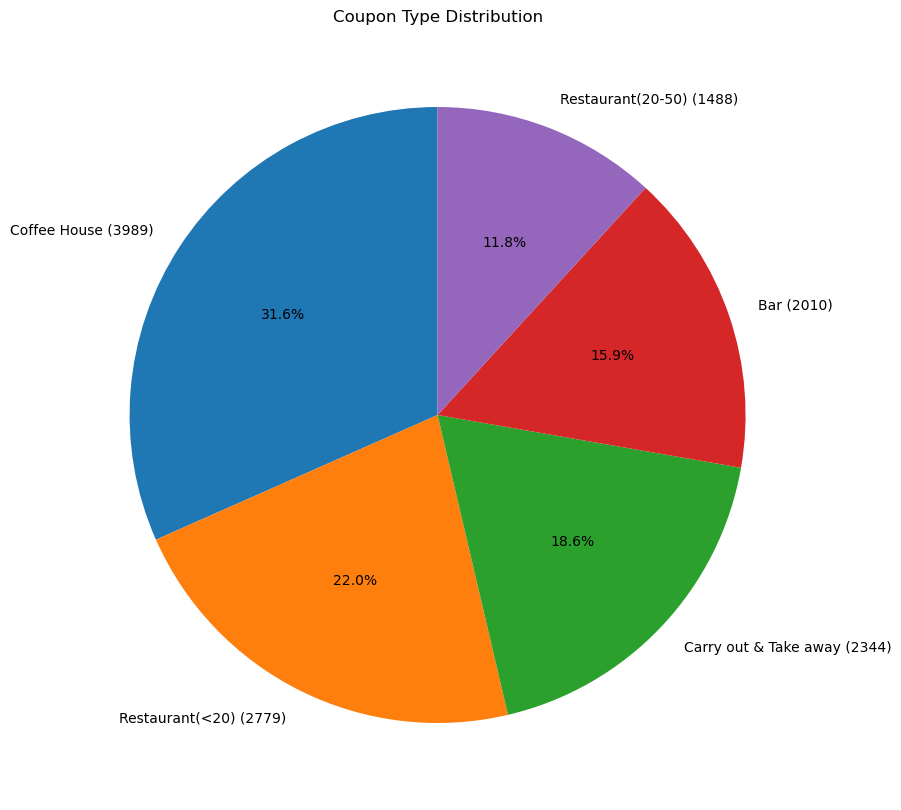

In [299]:
# pie chart for coupon types including total count and % of each type
coupon_counts = df['coupon'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(
    coupon_counts,
    labels=[f"{label} ({count})" for label, count in zip(coupon_counts.index, coupon_counts)],
    autopct='%1.1f%%',
    startangle=90,
)
plt.title("Coupon Type Distribution")
plt.show()

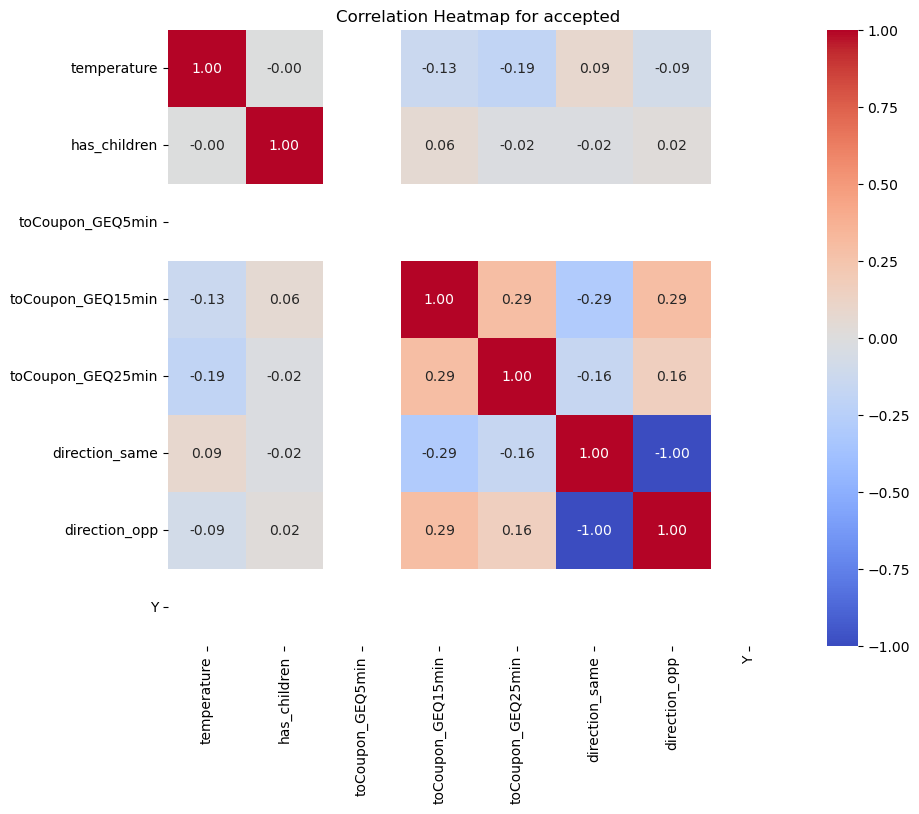

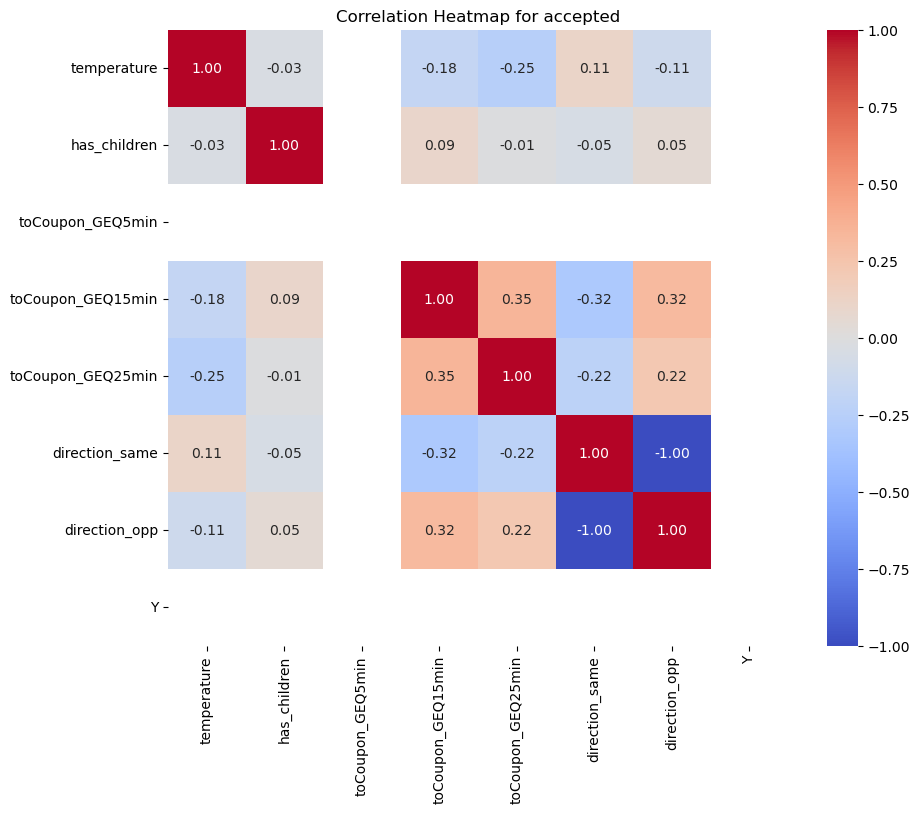

In [301]:
# heatmap of correlation matrix for further analysis

couponuse = df['coupon_used'].unique()

# Loop through each class to create plot
for used_coupon in couponuse:
    # Filter the DataFrame for the current class
    subset_df = df[df['coupon_used'] == used_coupon]
    numerical_subset_df = subset_df.select_dtypes(include=['int64', 'float64'])
    corr = numerical_subset_df.corr()

    plt.figure(figsize=(10, 8))  # Adjust the size as needed
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Heatmap for {coupon_used}')
    plt.show()



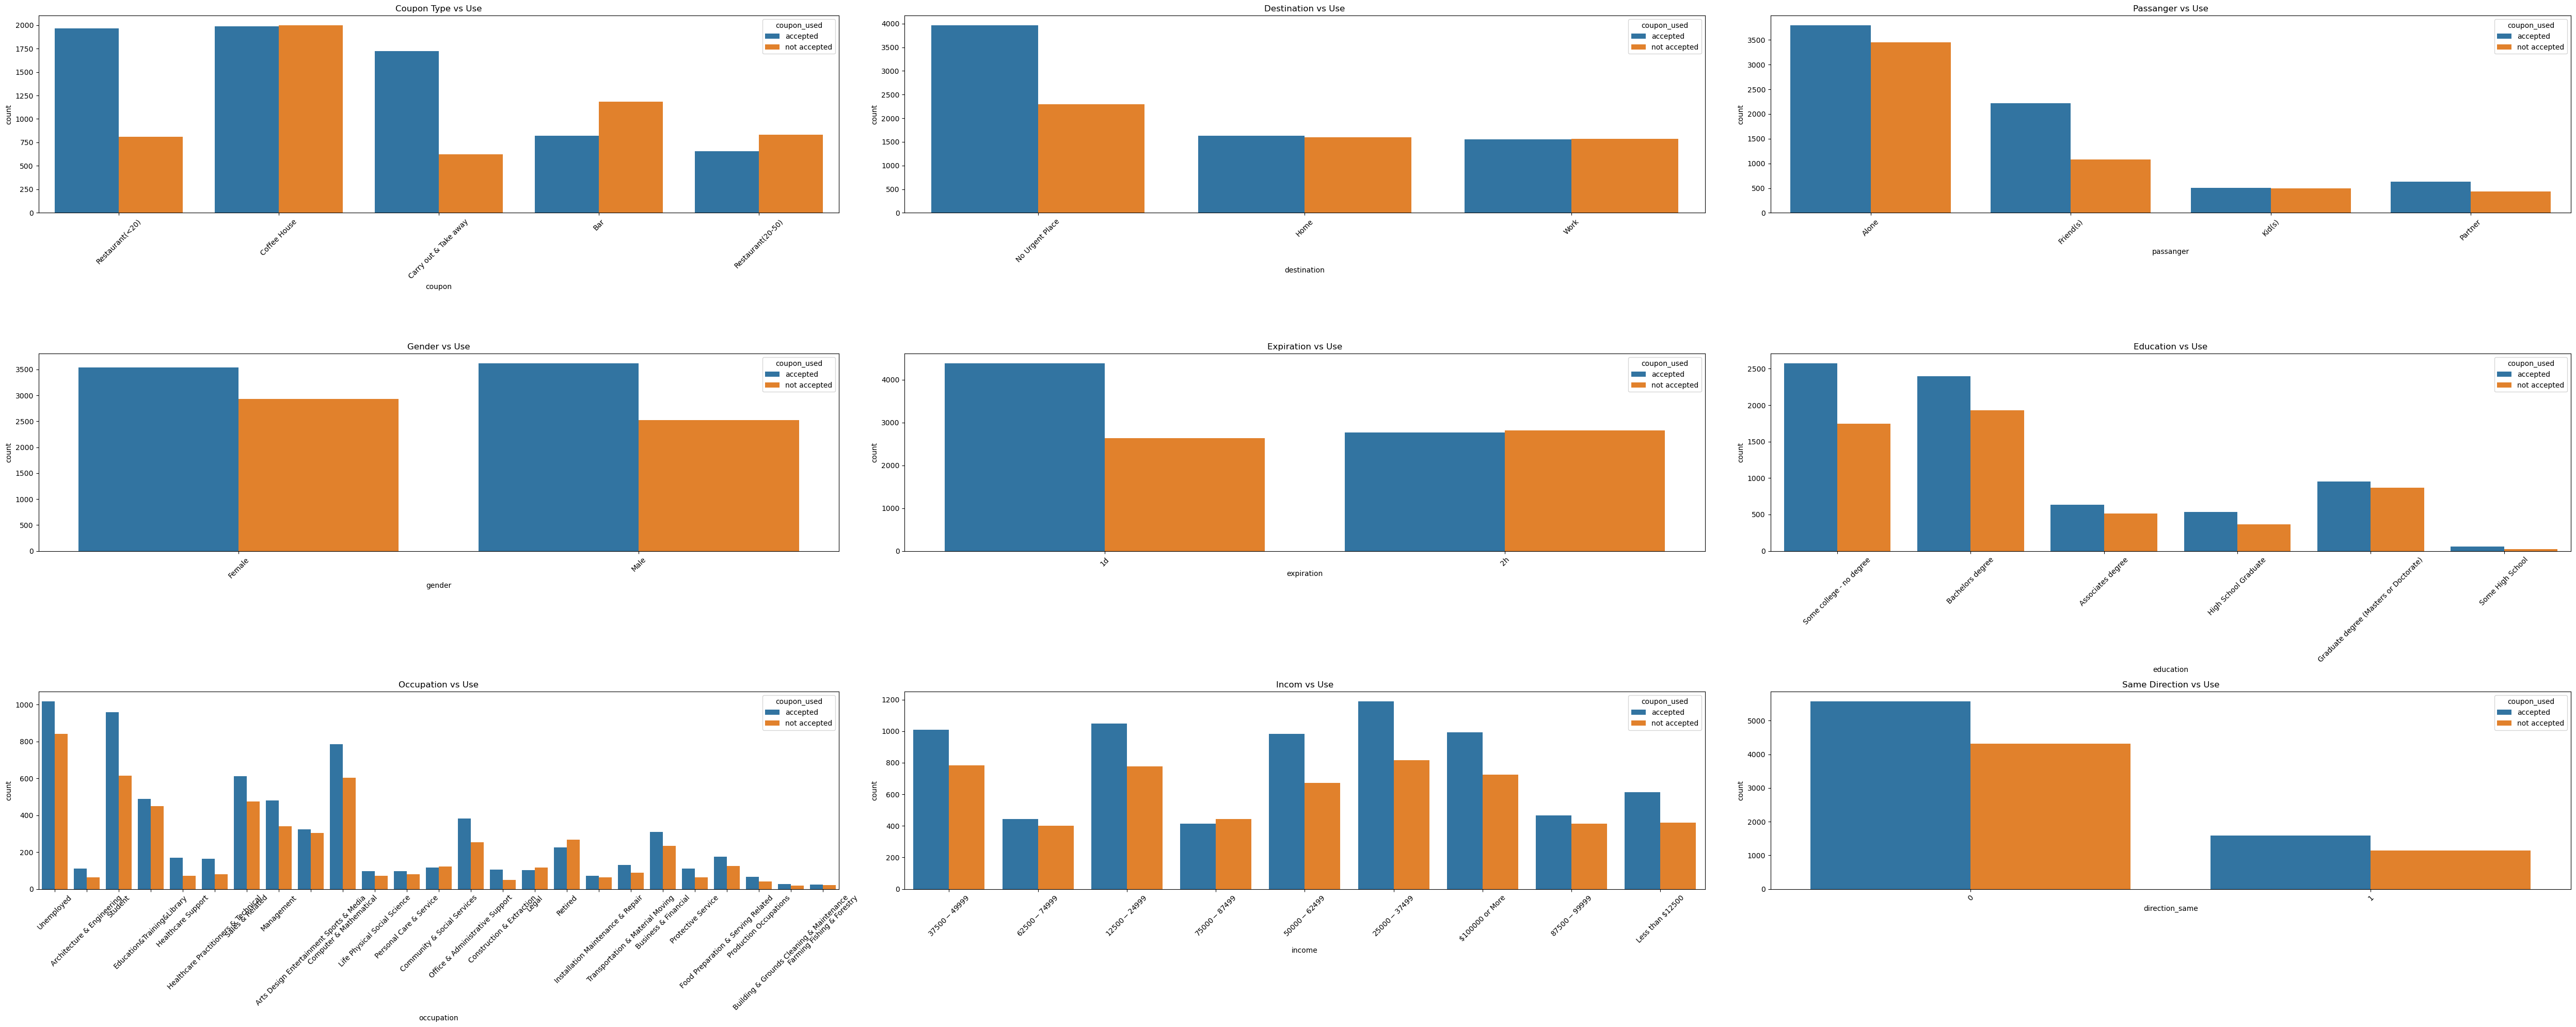

In [305]:
# plot bar charts to assess responder and driving scenario variables against coupon acceptance

plt.figure(figsize=(50, 20))

# Coupon Type
plt.subplot(3, 3, 1)
plt.title('Coupon Type vs Use')
plt.xticks(rotation=45)
sns.countplot(data=df, x='coupon', hue='coupon_used')

# Destination
plt.subplot(3, 3, 2)
plt.title('Destination vs Use')
plt.xticks(rotation=45)
sns.countplot(data=df, x='destination', hue='coupon_used')

# Passanger
plt.subplot(3, 3, 3)
plt.title('Passanger vs Use')
plt.xticks(rotation=45)
sns.countplot(data=df, x='passanger', hue='coupon_used')

# Gender
plt.subplot(3, 3, 4)
plt.title('Gender vs Use')
plt.xticks(rotation=45)
sns.countplot(data=df, x='gender', hue='coupon_used')

# Expiration
plt.subplot(3, 3, 5)
plt.title('Expiration vs Use')
plt.xticks(rotation=45)
sns.countplot(data=df, x='expiration', hue='coupon_used')

# Education
plt.subplot(3, 3, 6)
plt.title('Education vs Use')
plt.xticks(rotation=45)
sns.countplot(data=df, x='education', hue='coupon_used')

# Occupation
plt.subplot(3, 3, 7)
plt.title('Occupation vs Use')
plt.xticks(rotation=45)
sns.countplot(data=df, x='occupation', hue='coupon_used')

# Income
plt.subplot(3, 3, 8)
plt.title('Incom vs Use')
plt.xticks(rotation=45)
sns.countplot(data=df, x='income', hue='coupon_used')

# Direction Same
plt.subplot(3, 3, 9)
plt.title('Same Direction vs Use')
plt.xticks(rotation=45)
sns.countplot(data=df, x='direction_same', hue='coupon_used')

# Show the plots
plt.tight_layout()
plt.savefig("coupon_acceptance_box_plots.png")
plt.show()

# Evaluation

## Finding #1

Coupons for restaurants under $20, coffee houses and carry out/takeaway were accepted far more than bars and restaurants 20-50

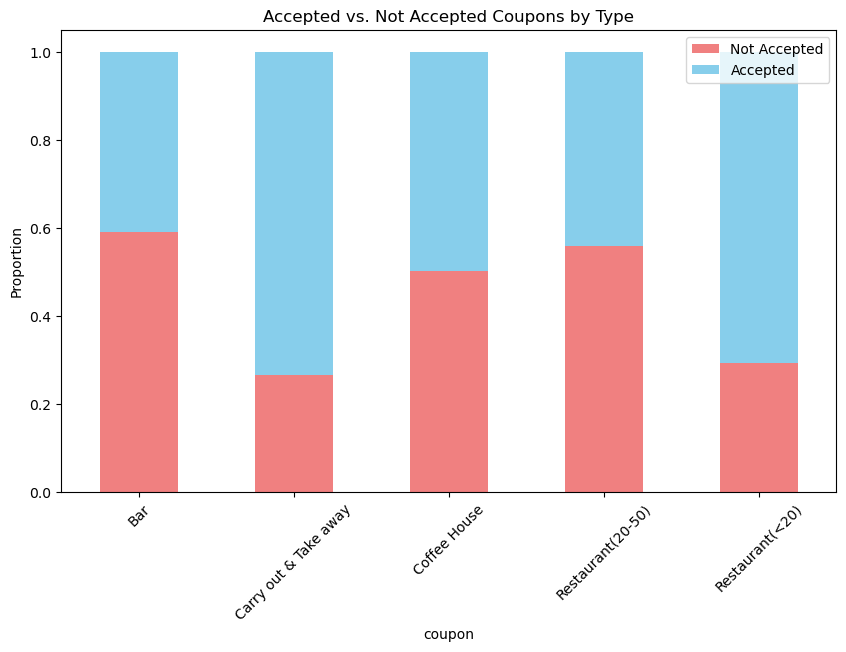

In [307]:
# Stacked bar chart for coupon acceptance by type
coupon_accept = df.groupby('coupon')['Y'].value_counts(normalize=True).unstack()
coupon_accept.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightcoral', 'skyblue'])
plt.title("Accepted vs. Not Accepted Coupons by Type")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(["Not Accepted", "Accepted"])
plt.show()

## Finding #2

People driving home and to work were slightly more likely to not accept coupons vs those driving elsewhere

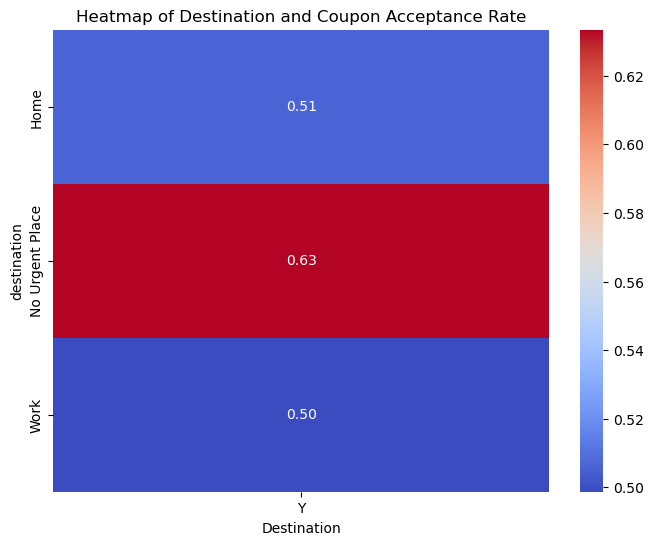

In [309]:

heatmap_data = df.pivot_table(
    values='Y',
    index='destination',
    aggfunc='mean'
)

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Destination and Coupon Acceptance Rate")
plt.xlabel("Destination")
plt.show()

## Finding #3

People driving with friends were more likely to accept coupons than those with their partner, kids or alone in the car

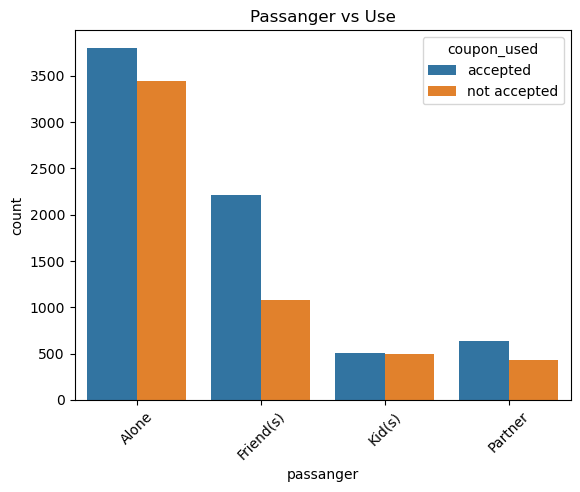

In [311]:
plt.title('Passanger vs Use')
plt.xticks(rotation=45)
sns.countplot(data=df, x='passanger', hue='coupon_used')
plt.show()

## Finding #4

Coupons with an expiration date of 1 day were much more likely to be accepted than those that expired in 2 hours

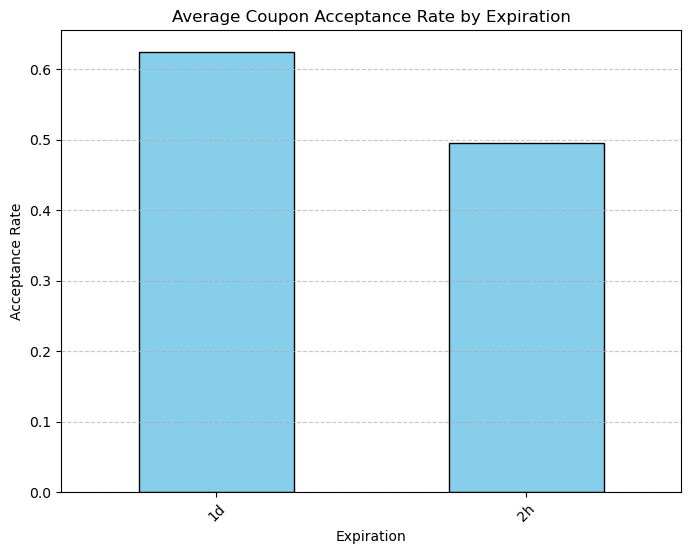

In [313]:
# Bar chart for expiration types
expiration_acceptance = df.groupby('expiration')['Y'].mean()
expiration_acceptance.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 6))
plt.title("Average Coupon Acceptance Rate by Expiration")
plt.ylabel("Acceptance Rate")
plt.xlabel("Expiration")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()